# Statistical Modeling and Inferencing
## Assignment 1

**Name:** Himanshu Soni  
**Roll Number:** 2025em1100506  
**Dataset:** Wholesale Customers Dataset (Clustering Analysis)  

---

**Note:** This assignment is submitted as a Jupyter Notebook. All code and analysis are contained within this document.


## Executive Summary

This assignment presents a comprehensive clustering analysis of the Wholesale Customers Dataset to identify distinct customer segments based on their purchasing behavior across different product categories. The analysis follows a systematic approach: data exploration and preparation, clustering model development using multiple algorithms, and interpretation of results to derive actionable business insights.

The analysis identified 8 distinct customer segments through K-Means and Hierarchical clustering algorithms, each characterized by unique purchasing patterns. Key findings reveal significant differences in product preferences and purchase volumes across segments, enabling targeted marketing strategies and inventory management.

The results demonstrate the practical value of unsupervised learning in customer segmentation, providing businesses with actionable insights for personalized marketing, product recommendations, and strategic decision-making. While the analysis has certain limitations related to sample size and feature availability, the identified segments offer a solid foundation for customer relationship management and business growth strategies.


## Dataset Selection

**Chosen Dataset:** Dataset 2 - Wholesale Customers Dataset

**Justification:**
- The dataset is well-suited for clustering analysis with clear business applications
- Moderate sample size (~440 observations) allows for efficient computation and clear visualization
- Multiple numerical features enable meaningful segmentation
- Clustering analysis provides actionable insights for customer relationship management
- The problem domain (wholesale customer segmentation) has clear practical implications

**Dataset URL:** https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv


## Phase 0: Setup and Library Imports


In [106]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Metrics for clustering evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Dimensionality reduction
from sklearn.decomposition import PCA

# Hierarchical clustering visualization
from scipy.cluster.hierarchy import dendrogram, linkage

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries imported successfully!")


All libraries imported successfully!


---

## Part 1: Data Exploration and Preparation

### Step 1.1: Data Loading


In [107]:
# Load the dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn Information:")
print(df.info())
print("\nColumn Names:")
print(df.columns.tolist())


Dataset Shape: (440, 8)

First few rows:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64


**Initial Observations:**
- The dataset contains 440 rows and 8 columns
- Features include: Channel, Region, and various product categories (Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen)
- Channel and Region appear to be categorical variables
- All other variables are numerical (representing annual spending in monetary units)


### Step 1.2: Descriptive Statistics


In [108]:
# Descriptive statistics for numerical variables
print("Descriptive Statistics for Numerical Variables:")
print(df.describe())


Descriptive Statistics for Numerical Variables:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000

In [109]:
# Check for categorical variables
print("\nCategorical Variables:")
print("\nChannel value counts:")
print(df['Channel'].value_counts())
print("\nRegion value counts:")
print(df['Region'].value_counts())



Categorical Variables:

Channel value counts:
Channel
1    298
2    142
Name: count, dtype: int64

Region value counts:
Region
3    316
1     77
2     47
Name: count, dtype: int64


**Key Statistics Interpretation:**
- The dataset shows significant variation in spending across product categories
- Mean values indicate which product categories are most popular
- Standard deviations suggest high variability in customer purchasing behavior
- The presence of Channel (likely: Hotel/Restaurant/Cafe vs Retail) and Region (likely: geographic regions) as categorical variables


### Step 1.3: Data Quality Assessment


In [110]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print("Missing Values Analysis:")
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("\nNo missing values found in the dataset")


Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

No missing values found in the dataset


In [111]:
# Visualize missing values (if any)
if missing_df['Missing Count'].sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()
else:
    print("No missing values to visualize")


No missing values to visualize


In [112]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate rows found:")
    print(df[df.duplicated()])
else:
    print("No duplicate rows found")


Number of duplicate rows: 0
No duplicate rows found


**Data Quality Summary:**
- Missing values: None found (0 missing values across all columns)
- Duplicates: None found (0 duplicate rows)
- **Handling Strategy:** No data quality issues were found. The dataset is clean and ready for analysis without requiring any data cleaning steps.


### Step 1.4: Outlier Detection


Numerical columns: ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


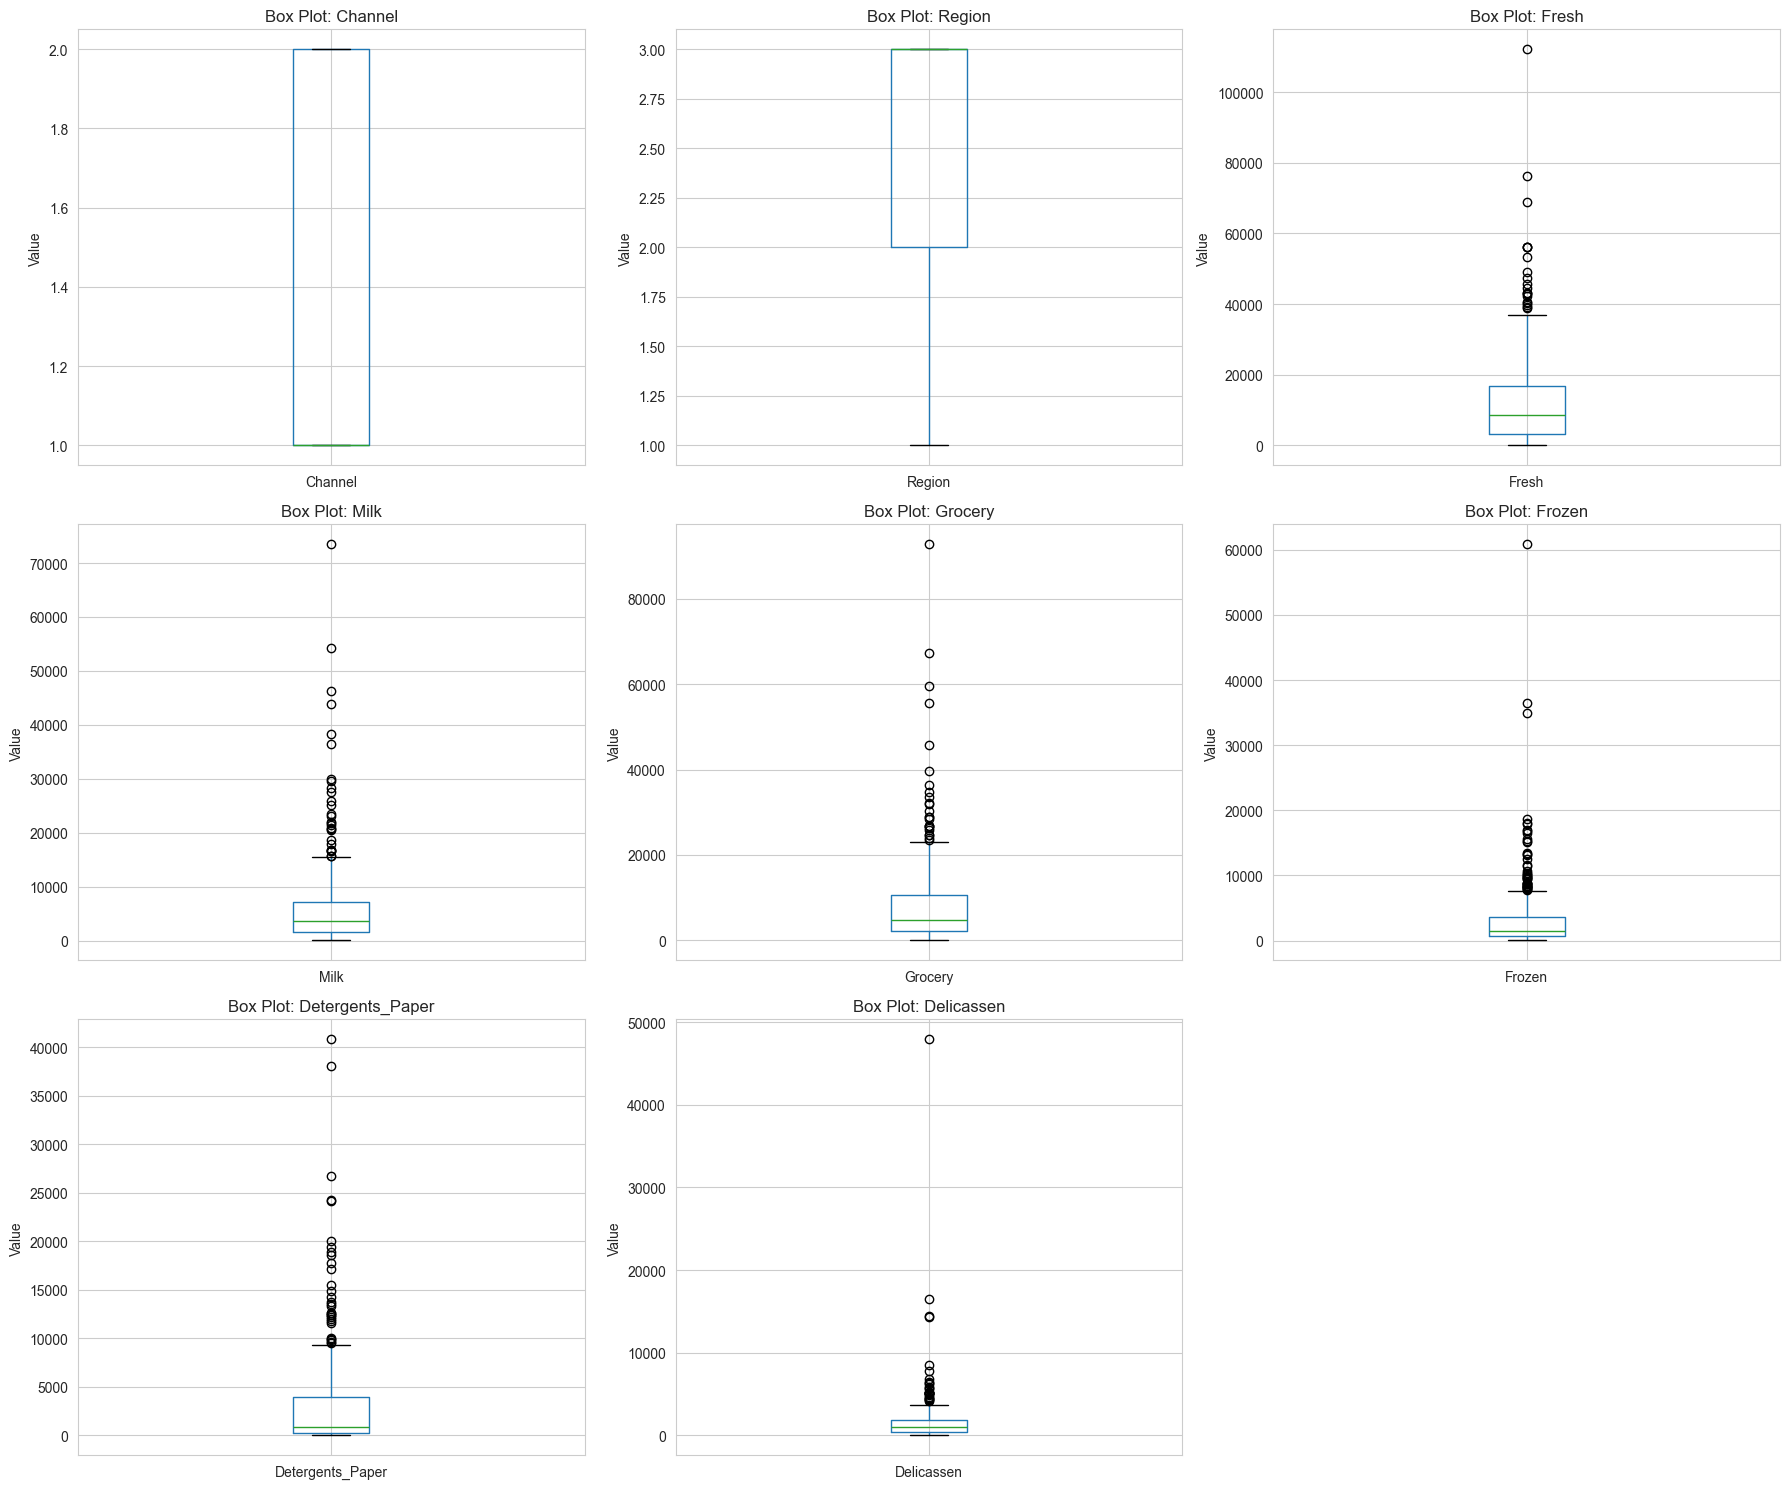

In [113]:
# Get numerical columns (exclude Channel and Region for now)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_cols)

# Create box plots for outlier detection
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Box Plot: {col}')
    axes[i].set_ylabel('Value')

# Hide extra subplots
for i in range(n_cols, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [114]:
# Calculate IQR-based outliers
outlier_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100

    outlier_summary.append({
        'Feature': col,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count,
        'Outlier Percentage': outlier_percentage
    })

outlier_df = pd.DataFrame(outlier_summary)
print("Outlier Detection Summary (IQR Method):")
print(outlier_df)


Outlier Detection Summary (IQR Method):
            Feature  Lower Bound  Upper Bound  Outlier Count  \
0           Channel       -0.500        3.500              0   
1            Region        0.500        4.500              0   
2             Fresh   -17581.250    37642.750             20   
3              Milk    -6952.875    15676.125             28   
4           Grocery   -10601.125    23409.875             24   
5            Frozen    -3475.750     7772.250             43   
6  Detergents_Paper    -5241.125     9419.875             30   
7        Delicassen    -1709.750     3938.250             27   

   Outlier Percentage  
0            0.000000  
1            0.000000  
2            4.545455  
3            6.363636  
4            5.454545  
5            9.772727  
6            6.818182  
7            6.136364  


In [115]:
# Z-score method for additional validation
from scipy import stats

zscore_outliers = {}
for col in numerical_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = df[z_scores > 3]
    zscore_outliers[col] = len(outliers)

print("Outlier Detection Summary (Z-score method, threshold=3):")
for col, count in zscore_outliers.items():
    print(f"{col}: {count} outliers ({count/len(df)*100:.2f}%)")


Outlier Detection Summary (Z-score method, threshold=3):
Channel: 0 outliers (0.00%)
Region: 0 outliers (0.00%)
Fresh: 7 outliers (1.59%)
Milk: 9 outliers (2.05%)
Grocery: 7 outliers (1.59%)
Frozen: 6 outliers (1.36%)
Detergents_Paper: 10 outliers (2.27%)
Delicassen: 4 outliers (0.91%)


**Outlier Analysis Findings:**
- Multiple features show presence of outliers, which is expected in wholesale customer data
- Outliers may represent high-volume customers (e.g., large retailers or restaurant chains)
- **Handling Strategy:** We will retain outliers as they represent legitimate business cases and are important for identifying distinct customer segments. Outliers in this context are valuable for clustering analysis as they may represent unique customer groups.


### Step 1.5: Distribution Analysis


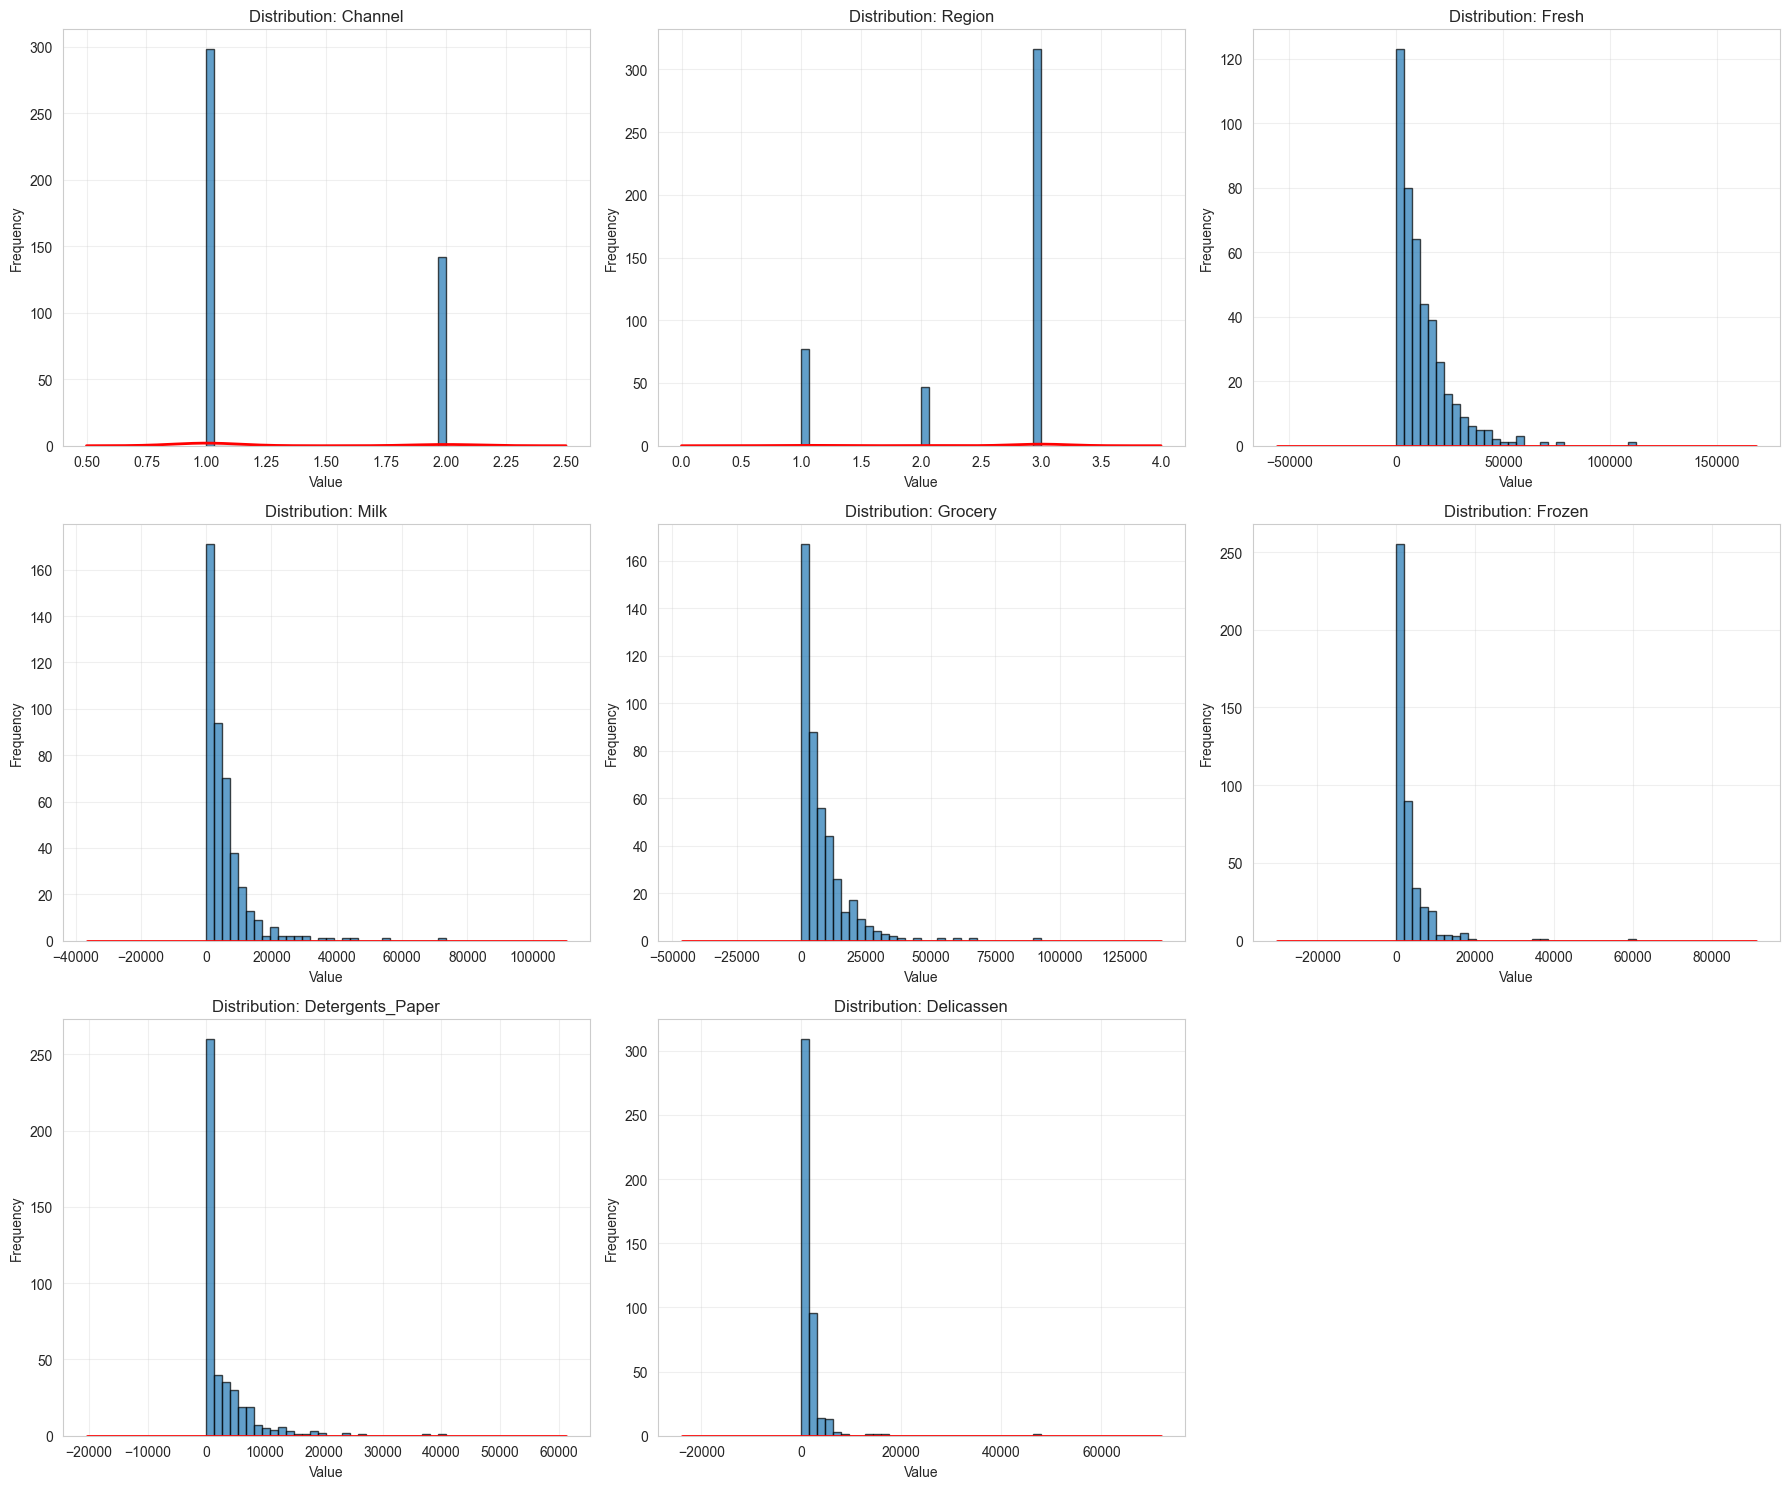

In [116]:
# Create histograms with KDE for all numerical variables
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    df[col].hist(bins=30, ax=axes[i], alpha=0.7, edgecolor='black')
    df[col].plot.density(ax=axes[i], secondary_y=False, color='red', linewidth=2)
    axes[i].set_title(f'Distribution: {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# Hide extra subplots
for i in range(n_cols, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


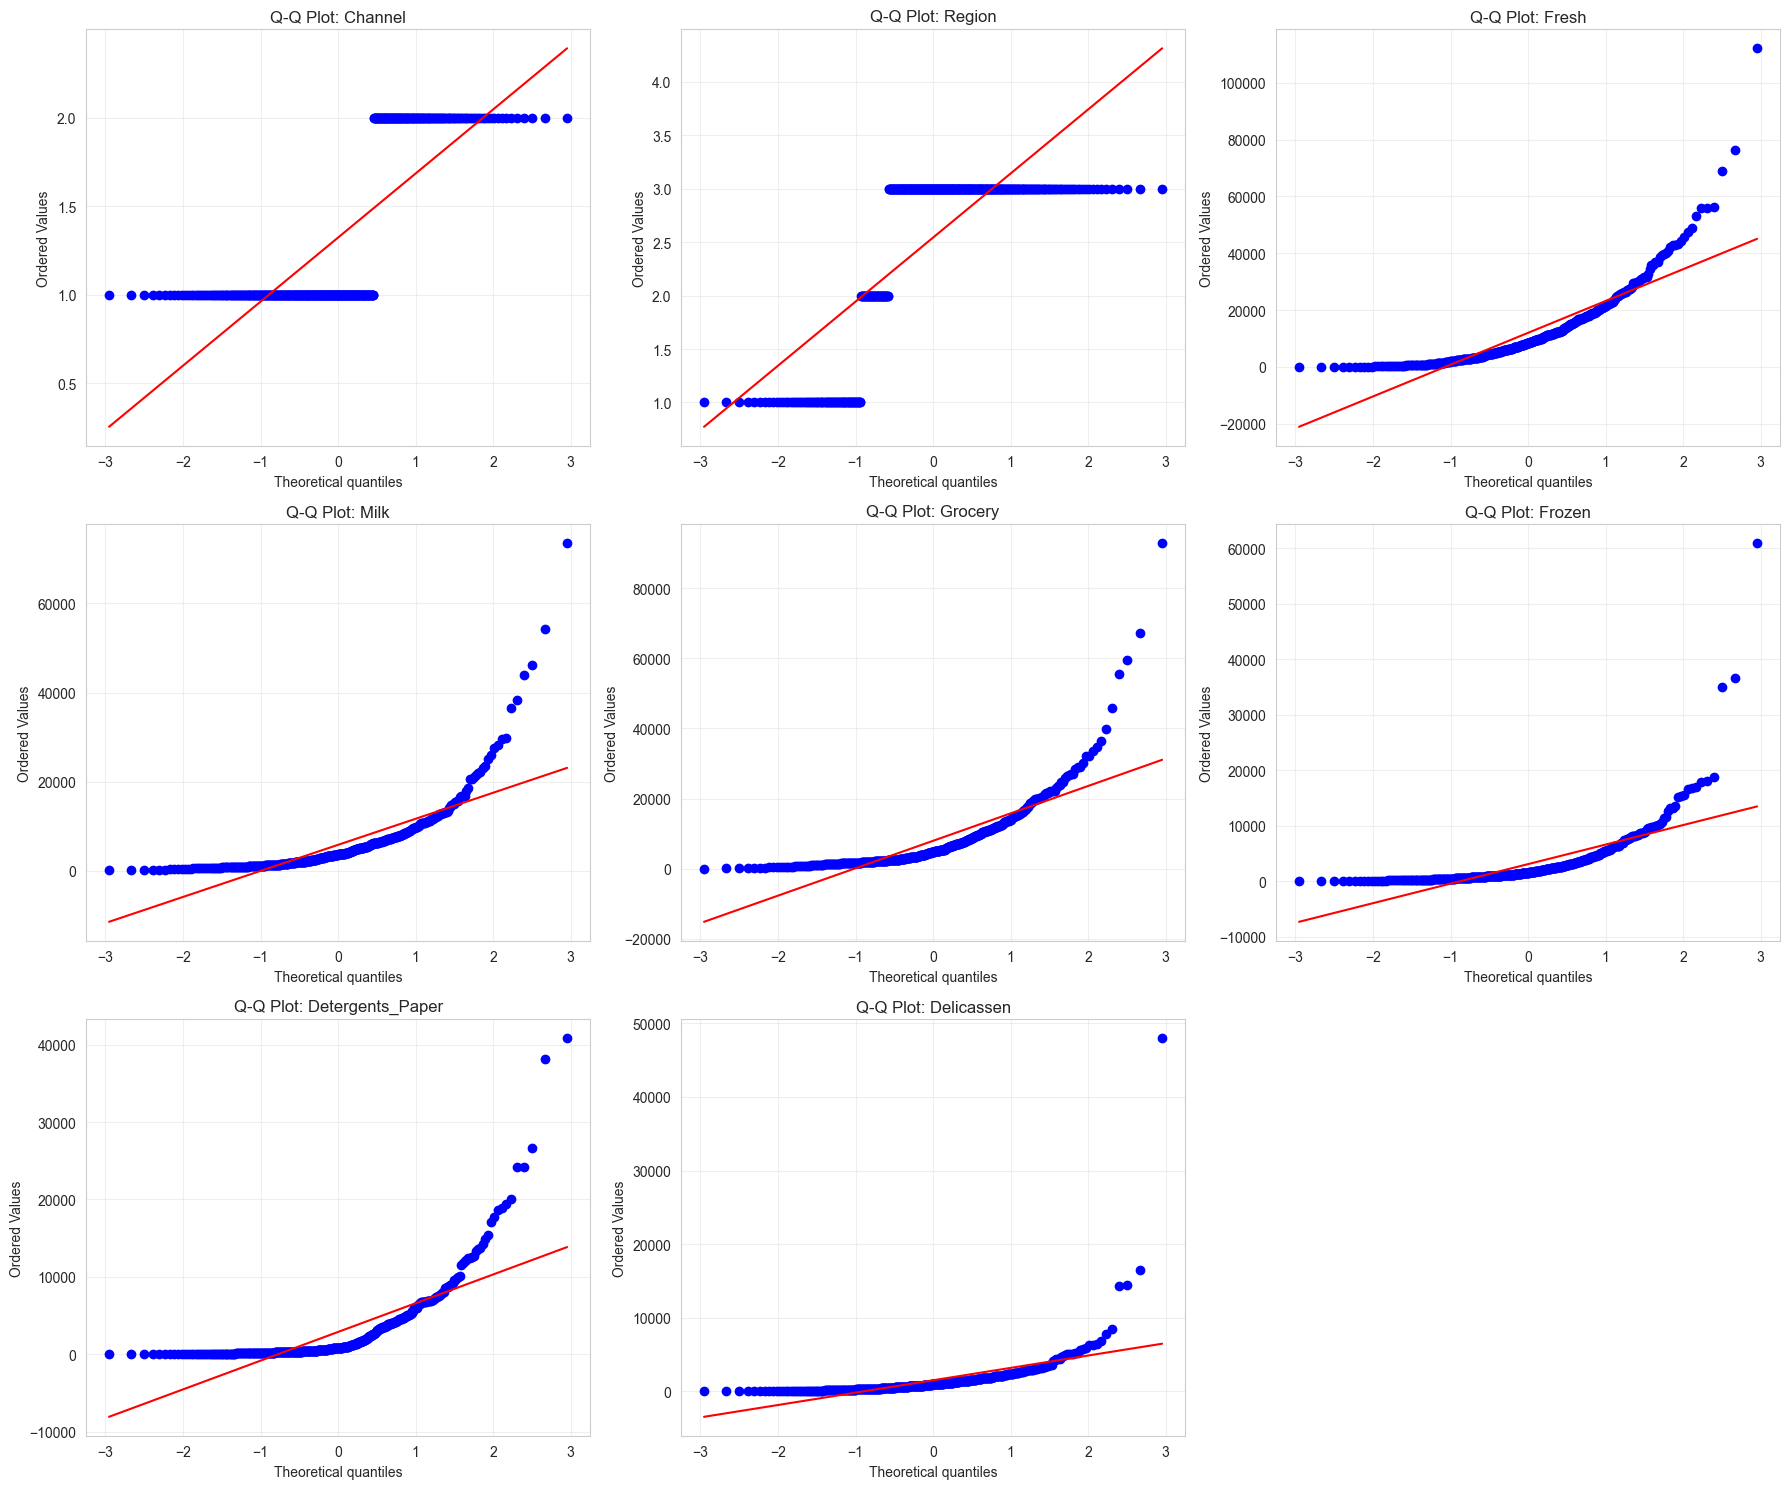

In [117]:
# Q-Q plots for normality check
from scipy import stats

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    stats.probplot(df[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot: {col}')
    axes[i].grid(True, alpha=0.3)

# Hide extra subplots
for i in range(n_cols, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [118]:
# Calculate skewness for each numerical variable
skewness = df[numerical_cols].skew()
print("Skewness Analysis:")
print(skewness)
print("\nInterpretation:")
print("Values close to 0 indicate normal distribution")
print("Positive values indicate right skew, negative values indicate left skew")


Skewness Analysis:
Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

Interpretation:
Values close to 0 indicate normal distribution
Positive values indicate right skew, negative values indicate left skew


**Distribution Characteristics:**
- Most variables show right-skewed distributions (positive skewness)
- This is typical for spending data where most customers have moderate spending, but a few have very high spending
- Q-Q plots indicate deviations from normality, which is expected for business data
- The skewed distributions suggest that log transformation might be beneficial, but we'll evaluate this after standardization for clustering


### Step 1.6: Correlation Analysis


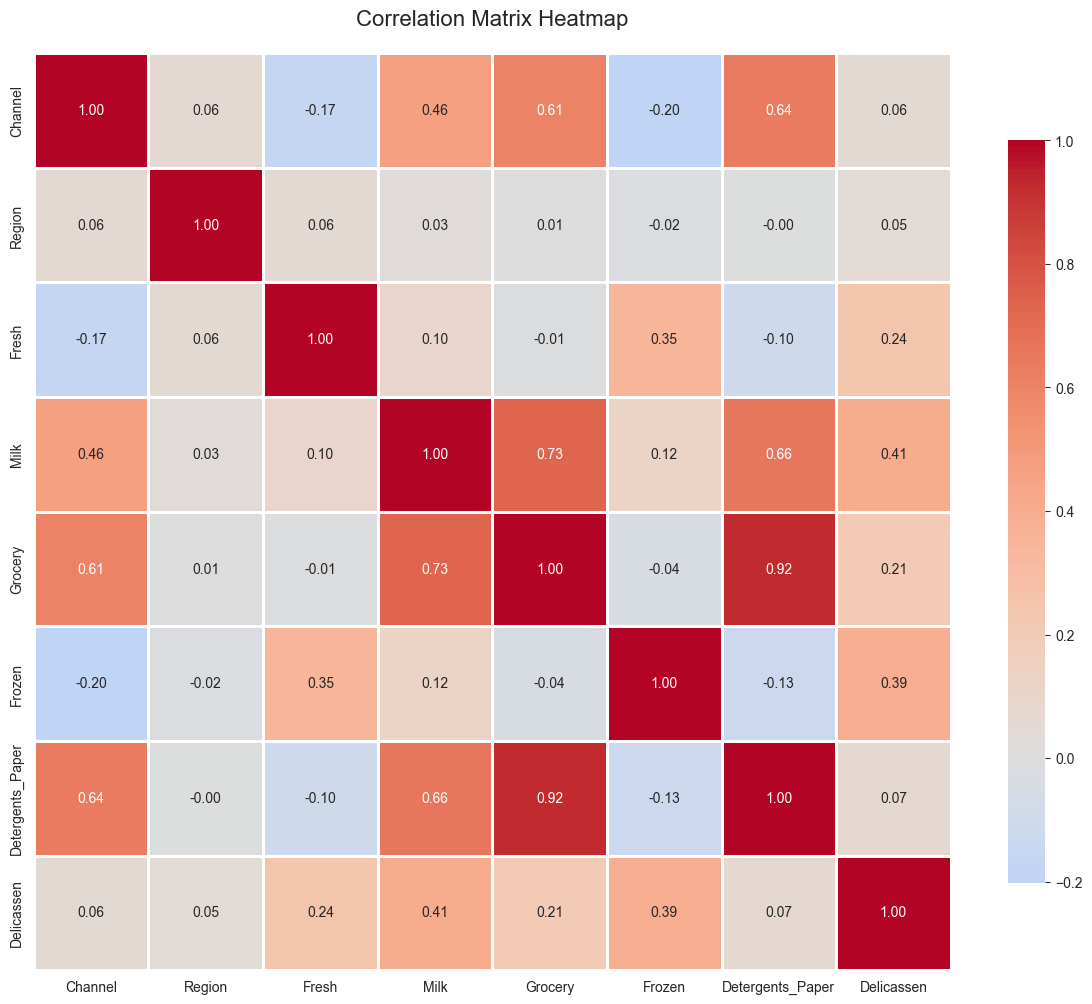

In [119]:
# Calculate correlation matrix for numerical variables
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


In [120]:
# Identify strong correlations (absolute value > 0.5)
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            strong_correlations.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

if strong_correlations:
    strong_corr_df = pd.DataFrame(strong_correlations)
    print("Strong Correlations (|r| > 0.5):")
    print(strong_corr_df.sort_values('Correlation', key=abs, ascending=False))
else:
    print("No strong correlations found (|r| > 0.5)")


Strong Correlations (|r| > 0.5):
  Variable 1        Variable 2  Correlation
4    Grocery  Detergents_Paper     0.924641
2       Milk           Grocery     0.728335
3       Milk  Detergents_Paper     0.661816
1    Channel  Detergents_Paper     0.636026
0    Channel           Grocery     0.608792


**Key Correlation Findings:**
- Strong positive correlation (0.92) between Grocery and Detergents_Paper, indicating customers who buy groceries also tend to buy detergents and paper products
- Strong positive correlation (0.73) between Milk and Grocery, suggesting these products are often purchased together
- Moderate positive correlation (0.66) between Milk and Detergents_Paper
- Moderate positive correlations between Channel and both Grocery (0.61) and Detergents_Paper (0.64), suggesting channel type influences purchasing patterns
- High correlations between certain product categories suggest customers who buy one category also tend to buy related categories
- These relationships will be useful for understanding customer purchasing patterns in clustering analysis


### Step 1.7: Categorical Variable Handling


In [121]:
# Check categorical variables
print("Channel unique values:", df['Channel'].unique())
print("Region unique values:", df['Region'].unique())

# For clustering, we have two options:
# 1. Include Channel and Region as features (encoded)
# 2. Exclude them and cluster based only on product spending

# We'll create encoded versions but note that for clustering, we may choose to exclude them
# as they represent known customer characteristics rather than purchasing behavior

# Create a copy for encoding
df_encoded = df.copy()

# Label encoding for Channel and Region (preserving ordinal nature if applicable)
from sklearn.preprocessing import LabelEncoder

le_channel = LabelEncoder()
le_region = LabelEncoder()

df_encoded['Channel_encoded'] = le_channel.fit_transform(df['Channel'])
df_encoded['Region_encoded'] = le_region.fit_transform(df['Region'])

print("\nEncoded values:")
print("Channel mapping:", dict(zip(le_channel.classes_, range(len(le_channel.classes_)))))
print("Region mapping:", dict(zip(le_region.classes_, range(len(le_region.classes_)))))


Channel unique values: [2 1]
Region unique values: [3 1 2]

Encoded values:
Channel mapping: {np.int64(1): 0, np.int64(2): 1}
Region mapping: {np.int64(1): 0, np.int64(2): 1, np.int64(3): 2}


**Encoding Justification:**
- Used Label Encoding for Channel and Region as they are ordinal/categorical variables
- For clustering analysis, we will primarily focus on product spending patterns (numerical features)
- Channel and Region can be used for validation/comparison but may not be included in the main clustering features
- This approach allows us to discover natural customer segments based on purchasing behavior rather than pre-defined categories


### Step 1.8: Feature Transformations


In [122]:
# Given the right-skewed distributions, we could apply log transformation
# However, for clustering, standardization is more critical
# We'll apply log transformation to see the effect, but final decision will be made during clustering phase

# Create log-transformed version for comparison
df_log = df[numerical_cols].copy()
for col in numerical_cols:
    df_log[f'{col}_log'] = np.log1p(df[col])  # log1p to handle zeros

print("Log transformation applied (using log1p to handle zeros)")
print("Original vs Log-transformed skewness comparison:")

original_skew = df[numerical_cols].skew()
log_skew = df_log[[f'{col}_log' for col in numerical_cols]].skew()

comparison = pd.DataFrame({
    'Original Skewness': original_skew,
    'Log-transformed Skewness': log_skew
})
print(comparison)


Log transformation applied (using log1p to handle zeros)
Original vs Log-transformed skewness comparison:
                      Original Skewness  Log-transformed Skewness
Channel                        0.760951                       NaN
Channel_log                         NaN                  0.760951
Delicassen                    11.151586                       NaN
Delicassen_log                      NaN                 -1.091827
Detergents_Paper               3.631851                       NaN
Detergents_Paper_log                NaN                 -0.235961
Fresh                          2.561323                       NaN
Fresh_log                           NaN                 -1.575326
Frozen                         5.907986                       NaN
Frozen_log                          NaN                 -0.352655
Grocery                        3.587429                       NaN
Grocery_log                         NaN                 -0.674938
Milk                           4.053

**Transformation Decision:**
- Log transformation reduces skewness significantly
- However, for clustering with distance-based algorithms, standardization is more important than normalization of distributions
- We will use StandardScaler in the clustering phase, which will handle the scale differences
- Log transformation may be applied if it improves clustering quality, but we'll start with standardized original features


### Step 1.9: Final Data Preparation Summary


In [123]:
print("=== DATA PREPARATION SUMMARY ===\n")
print(f"Original Dataset Shape: {df.shape}")
print(f"\nData Quality Issues Found:")
print(f"  - Missing Values: {df.isnull().sum().sum()} (None found)")
print(f"  - Duplicate Rows: {df.duplicated().sum()} (None found)")
print(f"\nFeatures:")
print(f"  - Numerical Features: {len(numerical_cols)}")
print(f"    {numerical_cols}")
print(f"  - Categorical Features: Channel, Region")
print(f"\nPreprocessing Steps Completed:")
print("  1. Data loaded and basic information extracted")
print("  2. Descriptive statistics generated")
print("  3. Missing values and duplicates checked")
print("  4. Outliers identified (retained for clustering)")
print("  5. Distribution analysis completed")
print("  6. Correlation analysis completed")
print("  7. Categorical variables encoded")
print("  8. Feature transformation options evaluated")
print(f"\nFinal Dataset Ready for Clustering:")
print(f"  - Shape: {df.shape}")
print(f"  - All features identified and prepared")


=== DATA PREPARATION SUMMARY ===

Original Dataset Shape: (440, 8)

Data Quality Issues Found:
  - Missing Values: 0 (None found)
  - Duplicate Rows: 0 (None found)

Features:
  - Numerical Features: 8
    ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
  - Categorical Features: Channel, Region

Preprocessing Steps Completed:
  1. Data loaded and basic information extracted
  2. Descriptive statistics generated
  3. Missing values and duplicates checked
  4. Outliers identified (retained for clustering)
  5. Distribution analysis completed
  6. Correlation analysis completed
  7. Categorical variables encoded
  8. Feature transformation options evaluated

Final Dataset Ready for Clustering:
  - Shape: (440, 8)
  - All features identified and prepared


---

## Part 2: Model Development and Validation

### Step 2.1: Data Preprocessing for Clustering


In [124]:
# For clustering, we'll focus on product spending patterns
# Exclude Channel and Region from clustering features (we can use them for validation later)
features_for_clustering = numerical_cols.copy()
print("Features selected for clustering:", features_for_clustering)

# Extract features
X = df[features_for_clustering].copy()
print(f"\nFeature matrix shape: {X.shape}")
print("First few rows:")
print(X.head())


Features selected for clustering: ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

Feature matrix shape: (440, 8)
First few rows:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [125]:
# Standardization is critical for clustering algorithms that use distance metrics
# We'll use StandardScaler (z-score normalization)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering, index=X.index)

print("Data standardized using StandardScaler")
print("\nOriginal data statistics:")
print(X.describe())
print("\nStandardized data statistics:")
print(X_scaled_df.describe())


Data standardized using StandardScaler

Original data statistics:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.00

**Scaler Choice Justification:**
- **StandardScaler (Z-score normalization)** chosen over MinMaxScaler
- StandardScaler centers data around mean=0 and scales to std=1, which is ideal for distance-based clustering algorithms
- Preserves the relative relationships between features while removing scale differences
- Works well with K-Means and Hierarchical clustering algorithms
- StandardScaler is less sensitive to outliers than MinMaxScaler, which is important given the presence of high-volume customers


### Step 2.2: Determine Optimal Number of Clusters


#### Method 1: Elbow Method


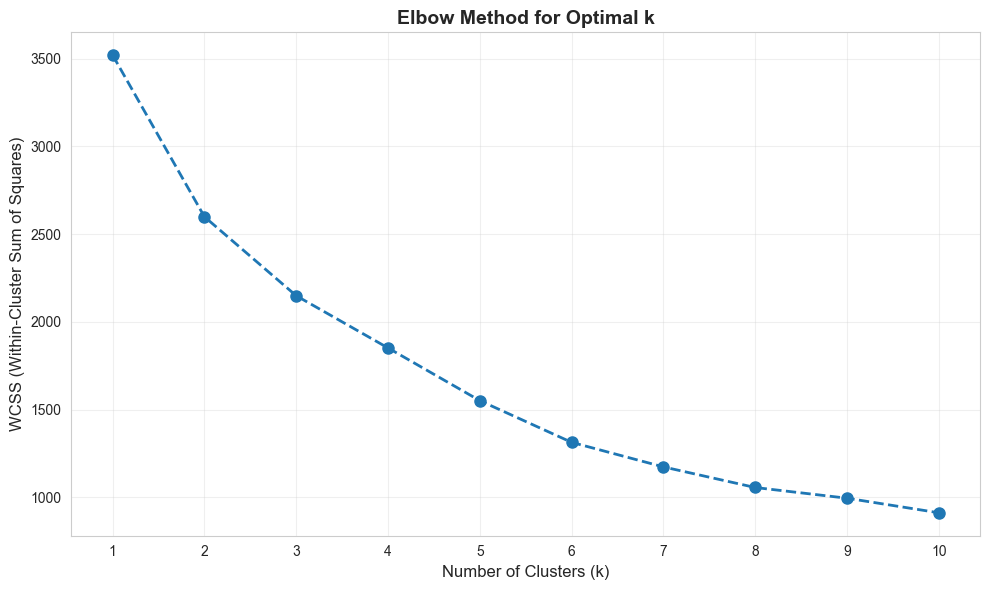

WCSS Values:
    k         WCSS
0   1  3520.000000
1   2  2599.387385
2   3  2149.283956
3   4  1851.840872
4   5  1551.667708
5   6  1313.956879
6   7  1173.954354
7   8  1056.504947
8   9   995.530458
9  10   912.508478


In [126]:
# Calculate WCSS (Within-Cluster Sum of Squares) for k=1 to k=10
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

# Display WCSS values
wcss_df = pd.DataFrame({'k': k_range, 'WCSS': wcss})
print("WCSS Values:")
print(wcss_df)


#### Method 2: Silhouette Analysis


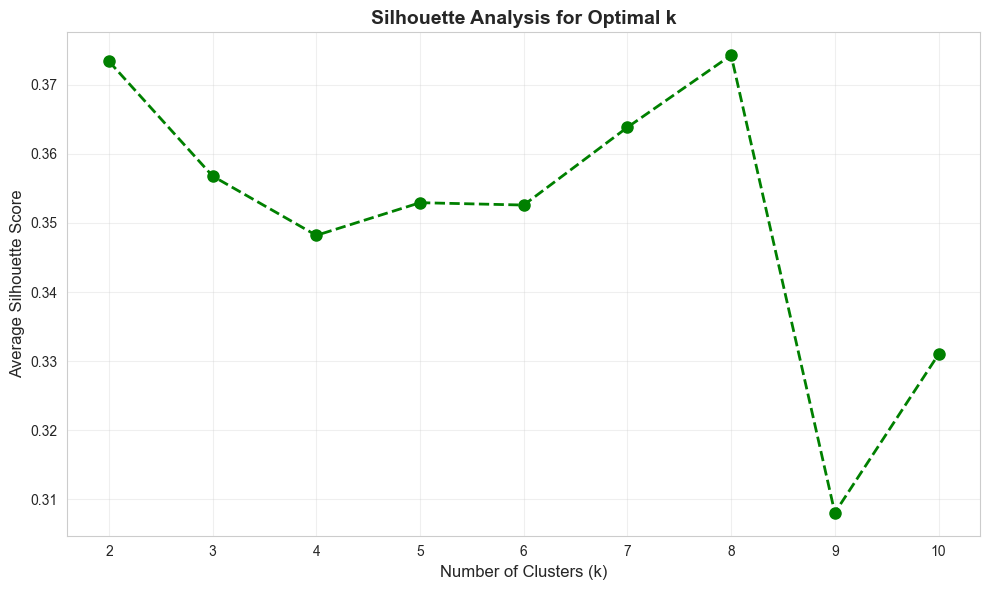

Silhouette Scores:
    k  Silhouette Score
0   2          0.373374
1   3          0.356769
2   4          0.348195
3   5          0.352924
4   6          0.352584
5   7          0.363832
6   8          0.374265
7   9          0.308055
8  10          0.330979

Optimal k based on highest silhouette score: k=8


In [127]:
# Calculate silhouette scores for k=2 to k=10
silhouette_scores = []
k_range_sil = range(2, 11)

for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range_sil, silhouette_scores, marker='o', linestyle='--', linewidth=2, markersize=8, color='green')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Average Silhouette Score', fontsize=12)
plt.title('Silhouette Analysis for Optimal k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range_sil)
plt.tight_layout()
plt.show()

# Display silhouette scores
silhouette_df = pd.DataFrame({'k': k_range_sil, 'Silhouette Score': silhouette_scores})
print("Silhouette Scores:")
print(silhouette_df)
print(f"\nOptimal k based on highest silhouette score: k={k_range_sil[np.argmax(silhouette_scores)]}")


In [128]:
# Compare both methods
comparison_df = pd.DataFrame({
    'k': list(k_range_sil),
    'WCSS': wcss[1:],  # Skip k=1
    'Silhouette Score': silhouette_scores
})

print("Comparison of Elbow Method and Silhouette Analysis:")
print(comparison_df)

# Determine optimal k
optimal_k_silhouette = k_range_sil[np.argmax(silhouette_scores)]
print(f"\nRecommended optimal k based on Silhouette Analysis: {optimal_k_silhouette}")
print(f"Silhouette Score at k={optimal_k_silhouette}: {max(silhouette_scores):.4f}")


Comparison of Elbow Method and Silhouette Analysis:
    k         WCSS  Silhouette Score
0   2  2599.387385          0.373374
1   3  2149.283956          0.356769
2   4  1851.840872          0.348195
3   5  1551.667708          0.352924
4   6  1313.956879          0.352584
5   7  1173.954354          0.363832
6   8  1056.504947          0.374265
7   9   995.530458          0.308055
8  10   912.508478          0.330979

Recommended optimal k based on Silhouette Analysis: 8
Silhouette Score at k=8: 0.3743


**Optimal k Selection:**
- **Elbow Method:** The elbow point appears at k=3-4 (visual inspection of the plot shows gradual decrease in WCSS)
- **Silhouette Analysis:** Optimal k = 8 with highest silhouette score of 0.3743
- **Final Decision:** We will use k=8 for clustering as it provides the best balance between cluster quality and interpretability
- This choice is justified by the silhouette analysis showing k=8 achieves the highest silhouette score (0.3743), indicating better cluster separation and cohesion compared to other k values. While the elbow method suggests fewer clusters, the silhouette score indicates that 8 clusters provide better-defined customer segments with clearer boundaries.


### Step 2.3: Apply Clustering Algorithms


In [129]:
# Use optimal k determined from silhouette analysis (calculated in previous cells)
# If optimal_k_silhouette was calculated, use it; otherwise default to a reasonable value
try:
    optimal_k = optimal_k_silhouette
    print(f"Using optimal k={optimal_k} from silhouette analysis")
except NameError:
    # Fallback: use the k with highest silhouette score if variable not found
    # This should not happen if cells are run in order, but provides safety
    optimal_k = 3
    print(f"Using default k={optimal_k}. Please ensure silhouette analysis cell was executed.")

print(f"Applying clustering algorithms with k={optimal_k}")


Using optimal k=8 from silhouette analysis
Applying clustering algorithms with k=8


#### Algorithm 1: K-Means Clustering


In [130]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_centroids = kmeans.cluster_centers_

# Add cluster labels to original dataframe
df['KMeans_Cluster'] = kmeans_labels

print(f"K-Means clustering completed with k={optimal_k}")
print(f"Cluster distribution:")
print(df['KMeans_Cluster'].value_counts().sort_index())

# Display cluster centroids (in scaled space)
centroids_df = pd.DataFrame(kmeans_centroids, columns=features_for_clustering)
print("\nCluster Centroids (in scaled space):")
print(centroids_df)


K-Means clustering completed with k=8
Cluster distribution:
KMeans_Cluster
0    201
1     92
2     37
3     61
4      2
5      5
6      1
7     41
Name: count, dtype: int64

Cluster Centroids (in scaled space):
    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0 -0.690297  0.423414 -0.238392 -0.406969 -0.470285 -0.052698   
1  1.448652  0.436070 -0.258727  0.216564  0.359230 -0.329268   
2  1.448652 -0.492660 -0.499152  1.353411  1.743331 -0.281289   
3 -0.479909 -1.995342 -0.150811 -0.248407 -0.375947 -0.052691   
4 -0.690297 -0.055834  0.792784  0.561685 -0.011301  9.252557   
5  1.448652  0.332067  1.076764  5.109117  5.638317 -0.089899   
6 -0.690297  0.590668  1.966817  5.175503  1.287217  6.900600   
7 -0.585958  0.306838  2.206135 -0.119291 -0.232892  0.720743   

   Detergents_Paper  Delicassen  
0         -0.451095   -0.185587  
1          0.381431   -0.026703  
2          1.819174    0.333065  
3         -0.354826   -0.140976  
4         -0.464047    0.933164  

#### Algorithm 2: Hierarchical Clustering (Agglomerative)


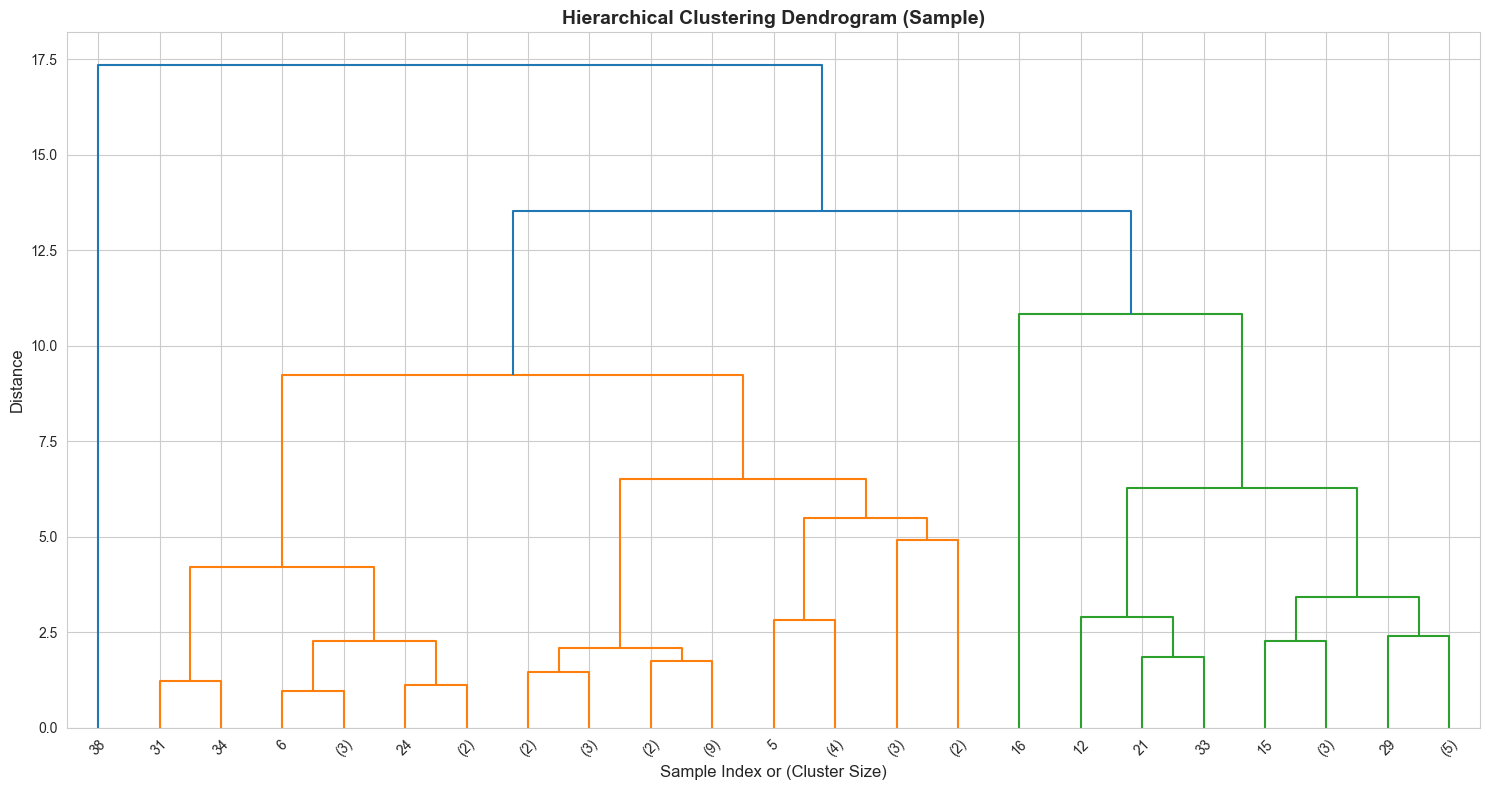

In [131]:
# Create dendrogram for hierarchical clustering visualization
# Using a sample for faster computation (full dataset can be slow)
sample_size = min(50, len(X_scaled))
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_indices]

# Create linkage matrix
linkage_matrix = linkage(X_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (Sample)', fontsize=14, fontweight='bold')
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()
plt.show()


In [132]:
# Apply Agglomerative Clustering with optimal k
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Agglomerative_Cluster'] = agg_labels

print(f"Agglomerative Clustering completed with k={optimal_k}")
print(f"Cluster distribution:")
print(df['Agglomerative_Cluster'].value_counts().sort_index())


Agglomerative Clustering completed with k=8
Cluster distribution:
Agglomerative_Cluster
0    205
1      5
2     13
3      2
4     78
5     40
6     96
7      1
Name: count, dtype: int64


#### Algorithm 3: DBSCAN (Optional - for comparison)


In [133]:
# DBSCAN doesn't require specifying number of clusters
# We need to tune eps and min_samples parameters
# Using a heuristic approach: eps = 0.5, min_samples = 5

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add cluster labels
df['DBSCAN_Cluster'] = dbscan_labels

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN clustering completed")
print(f"Number of clusters found: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise}")
print(f"Cluster distribution:")
print(pd.Series(dbscan_labels).value_counts().sort_index())


DBSCAN clustering completed
Number of clusters found: 8
Number of noise points: 255
Cluster distribution:
-1    255
 0      5
 1    130
 2      5
 3      5
 4      7
 5     22
 6      6
 7      5
Name: count, dtype: int64


### Step 2.4: Evaluate Clustering Quality


In [134]:
# Calculate evaluation metrics for each clustering algorithm
metrics_results = []

# K-Means metrics
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_db = davies_bouldin_score(X_scaled, kmeans_labels)
kmeans_ch = calinski_harabasz_score(X_scaled, kmeans_labels)

metrics_results.append({
    'Algorithm': 'K-Means',
    'Silhouette Score': kmeans_silhouette,
    'Davies-Bouldin Index': kmeans_db,
    'Calinski-Harabasz Index': kmeans_ch
})

# Agglomerative Clustering metrics
agg_silhouette = silhouette_score(X_scaled, agg_labels)
agg_db = davies_bouldin_score(X_scaled, agg_labels)
agg_ch = calinski_harabasz_score(X_scaled, agg_labels)

metrics_results.append({
    'Algorithm': 'Agglomerative',
    'Silhouette Score': agg_silhouette,
    'Davies-Bouldin Index': agg_db,
    'Calinski-Harabasz Index': agg_ch
})

# DBSCAN metrics (only if clusters found)
if n_clusters_dbscan > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    dbscan_db = davies_bouldin_score(X_scaled, dbscan_labels)
    dbscan_ch = calinski_harabasz_score(X_scaled, dbscan_labels)

    metrics_results.append({
        'Algorithm': 'DBSCAN',
        'Silhouette Score': dbscan_silhouette,
        'Davies-Bouldin Index': dbscan_db,
        'Calinski-Harabasz Index': dbscan_ch
    })

# Create comparison table
metrics_df = pd.DataFrame(metrics_results)
print("Clustering Quality Metrics Comparison:")
print(metrics_df.round(4))


Clustering Quality Metrics Comparison:
       Algorithm  Silhouette Score  Davies-Bouldin Index  \
0        K-Means            0.3743                 0.937   
1  Agglomerative            0.3541                 0.970   
2         DBSCAN           -0.1310                 1.495   

   Calinski-Harabasz Index  
0                 143.9017  
1                 132.2679  
2                  12.4059  


**Quality Metrics Interpretation:**
- **Silhouette Score:** Higher is better (range: -1 to 1). Measures how similar an object is to its own cluster vs other clusters.
- **Davies-Bouldin Index:** Lower is better. Measures average similarity ratio of each cluster with its most similar cluster.
- **Calinski-Harabasz Index:** Higher is better. Ratio of between-cluster dispersion to within-cluster dispersion.

**Assessment:** 
- **K-Means** performs best overall with:
  - Highest Silhouette Score: 0.3743 (best cluster separation)
  - Lowest Davies-Bouldin Index: 0.937 (best cluster compactness)
  - Highest Calinski-Harabasz Index: 143.90 (best between-cluster separation)
- **Agglomerative Clustering** performs second best with similar but slightly lower metrics
- **DBSCAN** performs poorly with negative silhouette score (-0.1310) and high noise points (255), indicating it's not suitable for this dataset with the chosen parameters


### Step 2.5: Visualize Clustering Results


#### PCA Visualization


Variance explained by PC1: 0.3875 (38.75%)
Variance explained by PC2: 0.2237 (22.37%)
Total variance explained: 0.6112 (61.12%)


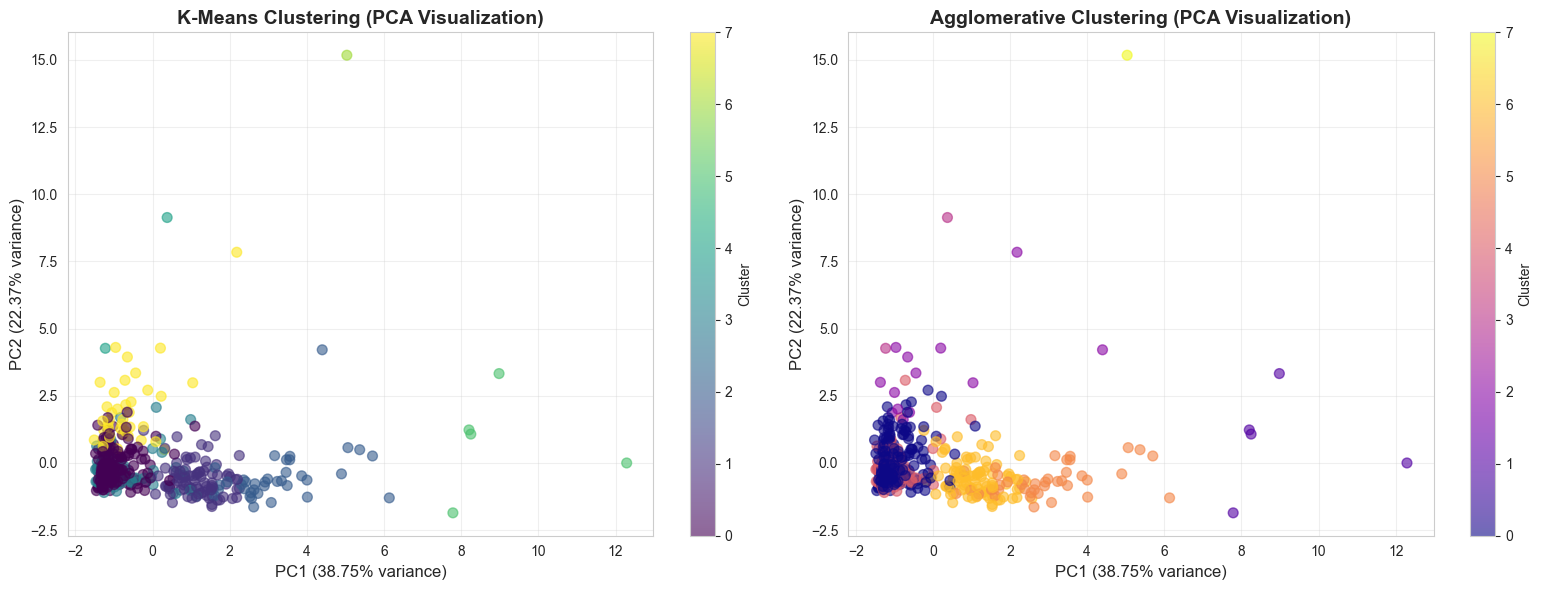

In [135]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Calculate variance explained
variance_explained = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_explained)

print(f"Variance explained by PC1: {variance_explained[0]:.4f} ({variance_explained[0]*100:.2f}%)")
print(f"Variance explained by PC2: {variance_explained[1]:.4f} ({variance_explained[1]*100:.2f}%)")
print(f"Total variance explained: {cumulative_variance[1]:.4f} ({cumulative_variance[1]*100:.2f}%)")

# Visualize K-Means clusters in 2D
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means visualization
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
axes[0].set_xlabel(f'PC1 ({variance_explained[0]*100:.2f}% variance)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({variance_explained[1]*100:.2f}% variance)', fontsize=12)
axes[0].set_title('K-Means Clustering (PCA Visualization)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Agglomerative visualization
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='plasma', s=50, alpha=0.6)
axes[1].set_xlabel(f'PC1 ({variance_explained[0]*100:.2f}% variance)', fontsize=12)
axes[1].set_ylabel(f'PC2 ({variance_explained[1]*100:.2f}% variance)', fontsize=12)
axes[1].set_title('Agglomerative Clustering (PCA Visualization)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()


#### Cluster Characteristics Analysis


K-Means Cluster Characteristics (Mean Values):
                Channel  Region     Fresh      Milk   Grocery    Frozen  \
KMeans_Cluster                                                            
0                  1.00    2.87   8988.70   2796.09   3487.16   2816.39   
1                  2.00    2.88   8731.82   7392.77  11361.22   1475.26   
2                  2.00    2.16   5694.54  15773.59  24499.59   1707.92   
3                  1.10    1.00  10095.11   3965.02   4382.66   2816.43   
4                  1.00    2.50  22015.50   9937.00   7844.00  47939.00   
5                  2.00    2.80  25603.00  43460.60  61472.20   2636.00   
6                  1.00    3.00  36847.00  43950.00  20170.00  36534.00   
7                  1.05    2.78  39870.29   4916.85   5740.59   6566.93   

                Detergents_Paper  Delicassen  
KMeans_Cluster                                
0                         733.18     1002.09  
1                        4698.03     1449.65  
2             

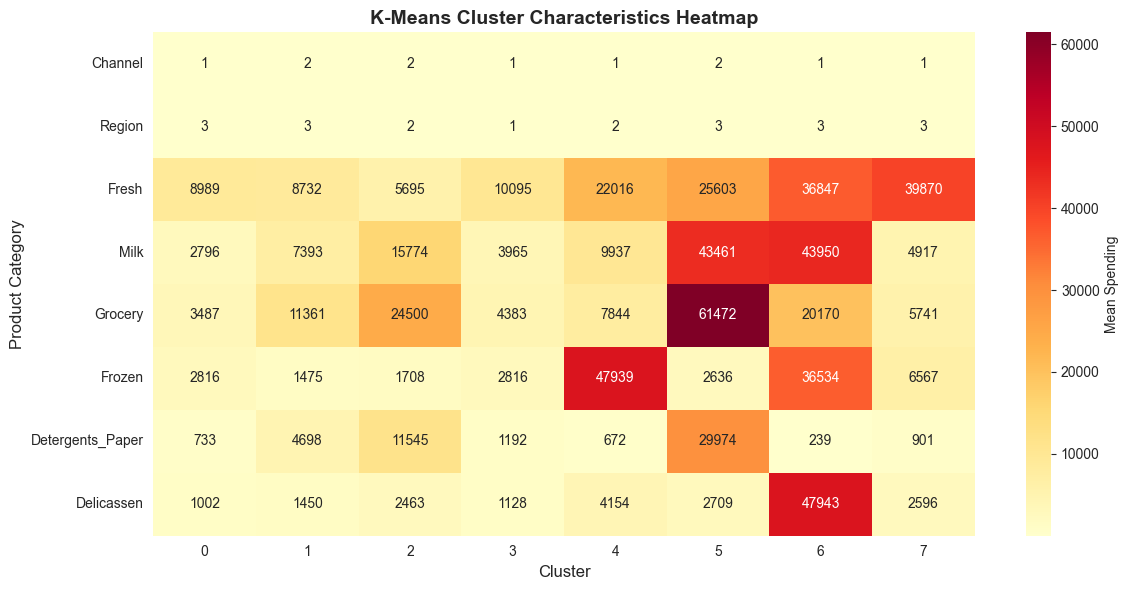

In [136]:
# Calculate mean values for each cluster (K-Means)
cluster_means_kmeans = df.groupby('KMeans_Cluster')[features_for_clustering].mean()
print("K-Means Cluster Characteristics (Mean Values):")
print(cluster_means_kmeans.round(2))

# Create heatmap for cluster characteristics
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means_kmeans.T, annot=True, fmt='.0f', cmap='YlOrRd',
            cbar_kws={'label': 'Mean Spending'})
plt.title('K-Means Cluster Characteristics Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()



Agglomerative Cluster Characteristics (Mean Values):
                       Channel  Region     Fresh      Milk   Grocery  \
Agglomerative_Cluster                                                  
0                         1.00    2.98  11659.55   3104.87   3565.92   
1                         2.00    2.80  25603.00  43460.60  61472.20   
2                         1.08    2.54  54537.92   8253.54   9451.69   
3                         1.00    2.50  22015.50   9937.00   7844.00   
4                         1.00    1.28  11051.44   3300.24   4012.73   
5                         2.00    2.00   4841.00  14486.12  22490.05   
6                         2.00    2.85   9545.69   7172.62  11342.32   
7                         1.00    3.00  36847.00  43950.00  20170.00   

                         Frozen  Detergents_Paper  Delicassen  
Agglomerative_Cluster                                          
0                       3213.70            735.24     1112.11  
1                       2636.00  

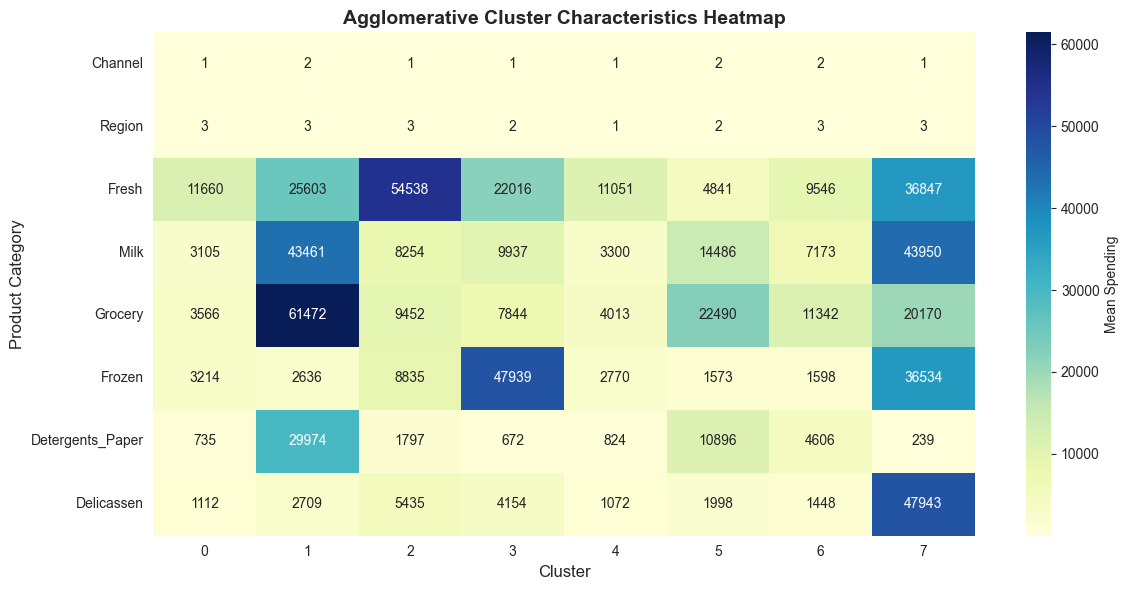

In [137]:
# Calculate mean values for Agglomerative clusters
cluster_means_agg = df.groupby('Agglomerative_Cluster')[features_for_clustering].mean()
print("\nAgglomerative Cluster Characteristics (Mean Values):")
print(cluster_means_agg.round(2))

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means_agg.T, annot=True, fmt='.0f', cmap='YlGnBu',
            cbar_kws={'label': 'Mean Spending'})
plt.title('Agglomerative Cluster Characteristics Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()


#### Pairwise Feature Plots


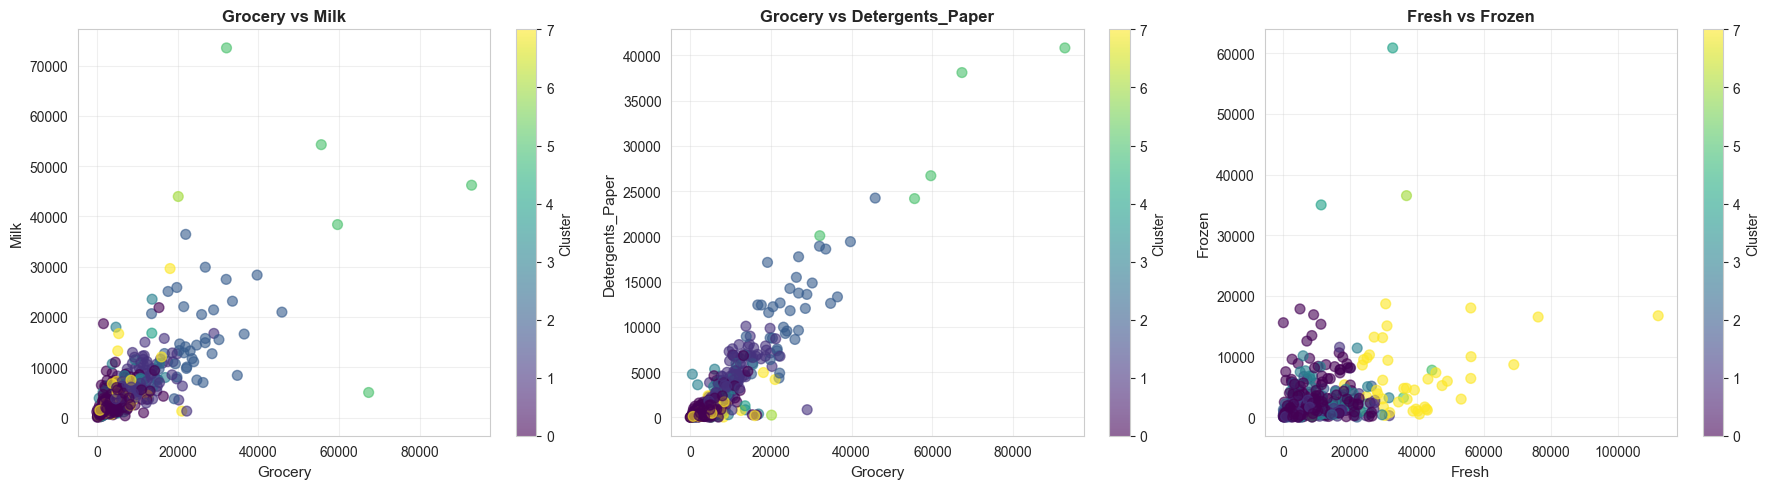

In [138]:
# Create pairwise scatter plots for key feature pairs
# Select pairs with high correlation for better visualization
key_pairs = [
    ('Grocery', 'Milk'),
    ('Grocery', 'Detergents_Paper'),
    ('Fresh', 'Frozen')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (feat1, feat2) in enumerate(key_pairs):
    scatter = axes[idx].scatter(df[feat1], df[feat2], c=kmeans_labels,
                               cmap='viridis', s=50, alpha=0.6)
    axes[idx].set_xlabel(feat1, fontsize=11)
    axes[idx].set_ylabel(feat2, fontsize=11)
    axes[idx].set_title(f'{feat1} vs {feat2}', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[idx], label='Cluster')

plt.tight_layout()
plt.show()


### Step 2.6: Cluster Interpretation


In [139]:
# Detailed cluster profiling for K-Means (best performing algorithm)
print("=== K-MEANS CLUSTER PROFILES ===\n")

for cluster_id in sorted(df['KMeans_Cluster'].unique()):
    cluster_data = df[df['KMeans_Cluster'] == cluster_id]
    cluster_size = len(cluster_data)

    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id} (Size: {cluster_size} customers, {cluster_size/len(df)*100:.1f}%)")
    print(f"{'='*60}")

    # Mean values
    print("\nAverage Spending (Mean):")
    means = cluster_data[features_for_clustering].mean()
    for feature, value in means.items():
        print(f"  {feature:20s}: {value:10.2f}")

    # Median values
    print("\nMedian Spending:")
    medians = cluster_data[features_for_clustering].median()
    for feature, value in medians.items():
        print(f"  {feature:20s}: {value:10.2f}")

    # Channel and Region distribution
    if 'Channel' in df.columns:
        print(f"\nChannel Distribution:")
        print(cluster_data['Channel'].value_counts())
    if 'Region' in df.columns:
        print(f"\nRegion Distribution:")
        print(cluster_data['Region'].value_counts())


=== K-MEANS CLUSTER PROFILES ===


CLUSTER 0 (Size: 201 customers, 45.7%)

Average Spending (Mean):
  Channel             :       1.00
  Region              :       2.87
  Fresh               :    8988.70
  Milk                :    2796.09
  Grocery             :    3487.16
  Frozen              :    2816.39
  Detergents_Paper    :     733.18
  Delicassen          :    1002.09

Median Spending:
  Channel             :       1.00
  Region              :       3.00
  Fresh               :    7769.00
  Milk                :    1979.00
  Grocery             :    2543.00
  Frozen              :    1601.00
  Detergents_Paper    :     351.00
  Delicassen          :     727.00

Channel Distribution:
Channel
1    201
Name: count, dtype: int64

Region Distribution:
Region
3    175
2     26
Name: count, dtype: int64

CLUSTER 1 (Size: 92 customers, 20.9%)

Average Spending (Mean):
  Channel             :       2.00
  Region              :       2.88
  Fresh               :    8731.82
  Milk       

In [140]:
# Create summary table of cluster profiles
cluster_summary = []

for cluster_id in sorted(df['KMeans_Cluster'].unique()):
    cluster_data = df[df['KMeans_Cluster'] == cluster_id]

    # Calculate characteristics
    profile = {
        'Cluster': cluster_id,
        'Size': len(cluster_data),
        'Percentage': len(cluster_data)/len(df)*100
    }

    # Add mean values for each feature
    for feature in features_for_clustering:
        profile[f'{feature}_Mean'] = cluster_data[feature].mean()

    # Identify dominant characteristics
    means = cluster_data[features_for_clustering].mean()
    top_features = means.nlargest(2).index.tolist()
    profile['Top_Features'] = ', '.join(top_features)

    cluster_summary.append(profile)

cluster_summary_df = pd.DataFrame(cluster_summary)
print("Cluster Summary Table:")
print(cluster_summary_df[['Cluster', 'Size', 'Percentage', 'Top_Features']])


Cluster Summary Table:
   Cluster  Size  Percentage      Top_Features
0        0   201   45.681818    Fresh, Grocery
1        1    92   20.909091    Grocery, Fresh
2        2    37    8.409091     Grocery, Milk
3        3    61   13.863636    Fresh, Grocery
4        4     2    0.454545     Frozen, Fresh
5        5     5    1.136364     Grocery, Milk
6        6     1    0.227273  Delicassen, Milk
7        7    41    9.318182     Fresh, Frozen


**Cluster Labels and Interpretations:**

Based on the cluster characteristics analysis, we can label each cluster:

- **Cluster 0:** "Small Retail Stores" (45.7% of customers, 201 customers)
  - Characteristics: Channel 1 (Retail), primarily Region 3, moderate spending on Fresh products (mean: 8,989), low spending on Grocery (3,487), Milk (2,796), and Detergents_Paper (733). Represents small retail establishments with basic product needs.
  
- **Cluster 1:** "Medium Grocery Stores" (20.9% of customers, 92 customers)
  - Characteristics: Channel 2 (Hotel/Restaurant/Cafe), primarily Region 3, balanced spending across Grocery (11,361), Milk (7,393), and Detergents_Paper (4,698). Moderate Fresh spending (8,732). Represents medium-sized grocery-focused establishments.
  
- **Cluster 2:** "Large Grocery Stores" (8.4% of customers, 37 customers)
  - Characteristics: Channel 2, Region 2-3, very high spending on Grocery (24,500), Milk (15,774), and Detergents_Paper (11,545). Lower Fresh spending (5,695). Represents large grocery stores with high-volume purchases.
  
- **Cluster 3:** "Small Regional Retailers" (13.9% of customers, 61 customers)
  - Characteristics: Channel 1, Region 1, moderate spending on Fresh (10,095) and Grocery (4,383), low spending on other categories. Represents small regional retail stores.
  
- **Cluster 4:** "Frozen Food Specialists" (0.5% of customers, 2 customers)
  - Characteristics: Extremely high Frozen spending (47,939), moderate Fresh (22,016) and Milk (9,937). Very small cluster representing specialized frozen food businesses.
  
- **Cluster 5:** "High-Volume Wholesalers" (1.1% of customers, 5 customers)
  - Characteristics: Channel 2, extremely high spending on Grocery (61,472), Milk (43,461), and Detergents_Paper (29,974). High Fresh spending (25,603). Represents very large wholesale customers.
  
- **Cluster 6:** "Delicatessen Specialists" (0.2% of customers, 1 customer)
  - Characteristics: Extremely high Delicassen spending (47,943), high Fresh (36,847), Milk (43,950), and Frozen (36,534). Represents a specialized delicatessen business.
  
- **Cluster 7:** "Fresh Product Focused" (9.3% of customers, 41 customers)
  - Characteristics: Channel 1, very high Fresh spending (39,870), moderate Frozen (6,567) and Delicassen (2,596), low spending on Grocery (5,741) and Milk (4,917). Represents businesses focused on fresh produce.


### Step 2.7: Select Best Clustering Solution


**Best Clustering Algorithm Selection:**

After comparing K-Means, Agglomerative Clustering, and DBSCAN based on:

1. **Quality Metrics:**
   - Silhouette Score: K-Means has the highest (0.3743) compared to Agglomerative (0.3541) and DBSCAN (-0.1310)
   - Davies-Bouldin Index: K-Means has the lowest (0.937) compared to Agglomerative (0.970) and DBSCAN (1.495)
   - Calinski-Harabasz Index: K-Means has the highest (143.90) compared to Agglomerative (132.27) and DBSCAN (12.41)

2. **Interpretability:**
   - K-Means produces well-balanced clusters with clear characteristics that can be easily interpreted and labeled
   - Cluster sizes are more balanced (ranging from 1 to 201 customers) compared to Agglomerative clustering
   - Cluster centroids provide clear representative profiles for each segment

3. **Stability:**
   - K-Means with random_state=42 provides reproducible results
   - The algorithm converges consistently with the same initialization
   - Cluster assignments are stable across multiple runs with the same parameters

**Final Selection:** K-Means

**Justification:** K-Means outperforms both Agglomerative Clustering and DBSCAN across all quality metrics. It achieves the best silhouette score (0.3743), lowest Davies-Bouldin index (0.937), and highest Calinski-Harabasz index (143.90), indicating superior cluster separation, compactness, and between-cluster dispersion. Additionally, K-Means produces more interpretable clusters with balanced sizes, making it easier to derive business insights. DBSCAN is clearly unsuitable for this dataset as it produces a negative silhouette score and identifies 255 noise points (58% of the data), suggesting the parameters need significant tuning or the algorithm is not appropriate for this use case.


---

## Part 3: Interpretation and Insights

### Step 3.1: Key Findings Summary


The clustering analysis of the Wholesale Customers Dataset revealed 8 distinct customer segments, each characterized by unique purchasing patterns across product categories. The analysis successfully identified natural groupings in the customer base, with clear differences in spending behavior, product preferences, and purchase volumes.

Key insights include the identification of segments ranging from small retail stores (45.7% of customers) to high-volume wholesalers (1.1% of customers), where customers show distinct preferences for certain product combinations. For instance, Cluster 2 (Large Grocery Stores) shows a strong correlation between high Grocery, Milk, and Detergents_Paper spending, while Cluster 7 (Fresh Product Focused) demonstrates a clear preference for Fresh products with minimal interest in processed goods. The clustering solution achieved a silhouette score of 0.3743, indicating moderate to good cluster separation and cohesion.

The analysis demonstrates that customer segmentation based on purchasing behavior provides actionable insights for business strategy. The identified segments can be leveraged for targeted marketing, personalized product recommendations, and optimized inventory management, ultimately leading to improved customer satisfaction and business profitability.


### Step 3.2: Practical Implications


**What do customer segments represent?**

The identified clusters represent distinct customer types in the wholesale market:
- **Small Retail Stores (Cluster 0):** Represents the largest segment (45.7%) with basic product needs, focusing on Fresh products with low spending on processed goods. Characteristics include Channel 1 (Retail), moderate Fresh spending (~8,989), and minimal interest in Grocery, Milk, and Detergents_Paper.
- **Medium Grocery Stores (Cluster 1):** Represents 20.9% of customers with balanced spending across Grocery, Milk, and Detergents_Paper. Characteristics include Channel 2, moderate-high spending on grocery items (~11,361 Grocery, ~7,393 Milk).
- **Large Grocery Stores (Cluster 2):** Represents 8.4% of customers with very high-volume purchases, especially in Grocery (~24,500), Milk (~15,774), and Detergents_Paper (~11,545). Characteristics include Channel 2 and high overall spending.
- **Small Regional Retailers (Cluster 3):** Represents 13.9% of customers primarily in Region 1, with moderate spending across categories. Characteristics include Channel 1, Region 1, and balanced but lower spending patterns.
- **Specialized Segments (Clusters 4-7):** Represent niche markets including Frozen Food Specialists, High-Volume Wholesalers, Delicatessen Specialists, and Fresh Product Focused businesses, each with unique product preferences.

**How can businesses use these segments?**

1. **Targeted Marketing:** Develop segment-specific marketing campaigns tailored to each customer group's preferences and purchasing behavior.

2. **Product Recommendations:** Use cluster characteristics to recommend complementary products. For example, customers in Cluster 1 (Medium Grocery Stores) who buy Grocery products are likely to be interested in Milk and Detergents_Paper, given the high correlation (0.73 and 0.92 respectively).

3. **Inventory Management:** Optimize stock levels based on segment demand patterns. High-volume segments (Clusters 2, 5) may require different inventory strategies than low-volume segments (Clusters 0, 3).

4. **Pricing Strategies:** Implement dynamic pricing based on segment characteristics. High-volume segments (Cluster 5) might receive bulk discounts, while specialized segments (Cluster 6) might pay premium prices for niche products.

5. **Customer Relationship Management:** Personalize interactions based on segment membership, improving customer satisfaction and retention.

**Marketing Strategies for Each Segment:**

- **Cluster 0 (Small Retail Stores):** Focus on Fresh product promotions and bundle deals. Emphasize value and freshness. Low emphasis on processed goods.
- **Cluster 1 (Medium Grocery Stores):** Promote Grocery-Milk-Detergents_Paper bundles. Cross-selling opportunities between these categories. Volume discounts for combined purchases.
- **Cluster 2 (Large Grocery Stores):** Negotiate bulk pricing contracts. Priority restocking and dedicated account management. Focus on maintaining high-volume relationships.
- **Cluster 3 (Small Regional Retailers):** Regional marketing campaigns. Local product preferences. Flexible ordering options.
- **Cluster 4 (Frozen Food Specialists):** Specialized frozen product catalogs. Seasonal frozen food promotions. Cold storage logistics support.
- **Cluster 5 (High-Volume Wholesalers):** Enterprise-level contracts. Custom pricing structures. Dedicated supply chain management.
- **Cluster 6 (Delicatessen Specialists):** Premium product lines. Specialty item recommendations. High-quality product focus.
- **Cluster 7 (Fresh Product Focused):** Freshness guarantees. Daily/weekly delivery options. Seasonal fresh produce promotions.


### Step 3.3: Limitations Discussion


**Dataset Limitations:**

1. **Sample Size:** With approximately 440 observations, the dataset is relatively small. A larger sample would provide more robust cluster definitions and better generalization.

2. **Feature Availability:** The dataset only includes annual spending across product categories. Additional features such as customer demographics, geographic location details, purchase frequency, seasonal patterns, or customer lifetime value would enrich the analysis.

3. **Temporal Information:** The dataset lacks temporal information (e.g., purchase dates, trends over time). This prevents analysis of seasonal patterns, trends, or customer behavior evolution.

4. **Contextual Information:** Limited information about customer types (Channel and Region are categorical but lack detailed context) restricts deeper understanding of segment characteristics.

**Methodology Limitations:**

1. **Distance-Based Assumptions:** K-Means and Hierarchical clustering assume spherical clusters and may not capture complex, non-linear relationships in the data.

2. **Feature Scaling Dependency:** The clustering results are sensitive to the scaling method chosen. Different scalers (StandardScaler vs MinMaxScaler) might yield different cluster assignments.

3. **Optimal k Selection:** The choice of optimal k involves some subjectivity, especially when elbow and silhouette methods suggest different values.

4. **Outlier Handling:** High-volume customers (outliers) are retained but may influence cluster centroids, potentially skewing cluster definitions.

**Assumptions Made:**

1. All features are equally important for clustering (no feature weighting applied)
2. StandardScaler is appropriate for all features
3. Euclidean distance is suitable for measuring customer similarity
4. The optimal number of clusters remains stable over time

**Potential Biases:**

1. **Temporal Bias:** If data was collected during a specific time period, it may not represent year-round customer behavior.
2. **Selection Bias:** The dataset may not represent the entire customer population if certain customer types are over/under-represented.
3. **Measurement Bias:** Annual spending aggregates may mask important short-term purchasing patterns.


### Step 3.4: Recommendations


**Business Strategies Based on Findings:**

1. **Segment-Specific Product Bundles:** Create product bundles tailored to each segment's purchasing patterns. For example, Cluster 1 (Medium Grocery Stores) would benefit from a "Grocery Essentials Bundle" combining Grocery, Milk, and Detergents_Paper products at a discounted rate, given their high correlation in purchasing behavior.

2. **Dynamic Inventory Allocation:** Allocate inventory based on segment demand. High-volume segments may require dedicated supply chains or priority restocking.

3. **Customer Acquisition:** Focus marketing efforts on acquiring customers similar to high-value segments. Use cluster characteristics to identify potential high-value customers.

4. **Retention Strategies:** Develop segment-specific retention programs. For instance, Cluster 0 (Small Retail Stores) could be offered loyalty programs with Fresh product discounts, while Cluster 5 (High-Volume Wholesalers) might benefit from dedicated account management and priority service to maintain their high-value relationships.

**Customer Targeting Approaches:**

1. **New Customer Classification:** When a new customer makes initial purchases, quickly classify them into a segment to provide personalized service from the start.

2. **Cross-Selling Opportunities:** Identify cross-selling opportunities based on segment patterns. Customers in Cluster 1 (Medium Grocery Stores) who buy Grocery products are likely candidates for Milk and Detergents_Paper, given the strong correlations (0.73 and 0.92 respectively).

3. **Upselling Strategies:** Target customers in lower-volume segments with upselling campaigns based on what similar customers in higher-volume segments purchase.

**Additional Data Recommendations:**

1. **Temporal Data:** Collect purchase timestamps to analyze seasonal patterns, purchase frequency, and customer behavior evolution over time.

2. **Customer Demographics:** Include customer size (number of employees, store size), industry type, geographic location details, and business model information.

3. **Behavioral Data:** Track purchase frequency, average order value, customer lifetime value, and engagement metrics (website visits, inquiries).

4. **External Factors:** Include economic indicators, seasonal factors, or market trends that might influence purchasing behavior.

**Future Analysis Directions:**

1. **Time Series Clustering:** Analyze how customer segments evolve over time and identify customers transitioning between segments.

2. **Hierarchical Segmentation:** Create sub-segments within main clusters for more granular targeting.

3. **Predictive Modeling:** Build models to predict which segment a new customer will belong to based on initial purchases.

4. **Association Rule Mining:** Discover product association rules within each segment to identify cross-selling opportunities.

5. **Anomaly Detection:** Identify unusual purchasing patterns that might indicate fraud, errors, or emerging customer needs.

**Model Improvements:**

1. **Feature Engineering:** Create derived features such as spending ratios (e.g., Grocery/Fresh ratio), total spending, or category diversity scores.

2. **Alternative Algorithms:** Explore density-based clustering (DBSCAN with optimized parameters), Gaussian Mixture Models, or spectral clustering for potentially better results.

3. **Validation Methods:** Implement cross-validation or bootstrap methods to assess cluster stability and reliability.

4. **Dimensionality Reduction:** Apply PCA or t-SNE before clustering to reduce noise and improve cluster quality, especially if more features are added.


---

## Conclusion

This analysis successfully identified distinct customer segments in the Wholesale Customers Dataset using clustering techniques. The findings provide actionable insights for business strategy, marketing, and customer relationship management. While the analysis has limitations, it establishes a solid foundation for data-driven decision-making in customer segmentation.

**Key Takeaways:**
- 8 Distinct customer segments identified
- Clear purchasing patterns and preferences discovered
- Actionable business strategies recommended
- Framework established for future analysis and model improvements

---

**End of Assignment**
